# Trabalho IV - Metropolis
### Gabriel Victor Carvalho Rocha - 2018054907

In [1]:
import matplotlib.pyplot as plt
from numba import jit
import numpy as np

In [2]:
@jit(nopython=True)
def estado_inicial(N):
    s = np.zeros(N, dtype=np.int16)
    for i in range(N):
        s[i] = np.sign(2 * np.random.random() - 1)
    return s

In [3]:
@jit(nopython=True)
def vizinhos(L, N):
    viz = np.zeros((N, 4), dtype = np.int16)
    for k in range(N):
        viz[k, 0] = k + 1
        if (k + 1) % L == 0: viz[k, 0] = k + 1 - L
        viz[k, 1] = k + L
        if k > (N - L - 1): viz[k, 1] = k + L - N
        viz[k, 2] = k - 1
        if k % L == 0: viz[k, 2] = k + L - 1
        viz[k, 3] = k - L
        if k < L: viz[k, 3] = k + N - L
    return viz

In [4]:
@jit(nopython=True)
def energia(s, viz, N):
    ener = 0
    for i in range(N):
        h = s[viz[i, 0]] + s[viz[i, 1]]
        ener -= s[i] * h
    ener = int((ener + 2 * N) / 4)
    return ener

In [5]:
@jit(nopython=True)
def expos(beta):
    ex = np.zeros(5, dtype=np.float32)
    ex[0] = np.exp(8.0 * beta)
    ex[1] = np.exp(4.0 * beta)
    ex[2] = 0.0
    ex[3] = np.exp(-4.0 * beta)
    ex[4] = np.exp(-8.0 * beta)
    return ex

In [6]:
@jit(nopython=True)
def passo_monte_carlo(beta, s, viz, ener, mag):
    N = len(s)
    ex = expos(beta)
    for i in range(N):
        h = s[viz[i, 0]] + s[viz[i, 1]] + s[viz[i, 2]] + s[viz[i, 3]]
        de = int(s[i] * h * 0.5 + 2)
        if np.random.random() < ex[de]:
            ener += 2 * s[i] * h
            mag -= 2 * s[i]
            s[i] = -s[i]
    return ener, mag, s

In [7]:
@jit(nopython=True)
def loop_monte_carlo(T, L, PASSOS):
    N = L * L
    beta = 1 / T
    
    viz = vizinhos(L, N)
    s = estado_inicial(N)
    ener = energia(s, viz, N)
    mag = np.sum(s)
    
    aener = np.zeros(PASSOS, dtype=np.float32)
    amag = np.zeros(PASSOS, dtype=np.float32)
    
    for i in range(1, PASSOS):
        ener, mag, s = passo_monte_carlo(beta, s, viz, ener, mag)
        aener[i] = ener
        amag[i] = mag
    return aener, amag

In [8]:
def grafico(T, L, PASSOS):
    ener, mag = loop_monte_carlo(T, L, PASSOS)
    plt.plot(np.arange(0, PASSOS), ener, label="Ener")
    plt.plot(np.arange(0, PASSOS), mag, label="Mag")
    plt.xlabel("Passos de Monte Carlo")
    plt.title(f"L = {L}; T = {T};")
    plt.legend()
    plt.show()

## Fixando o L em 36 e variando o T em [0.5, 1, 1.5, 2, 2.5, 3]

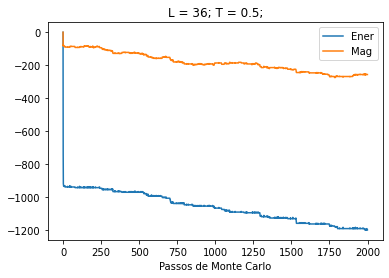

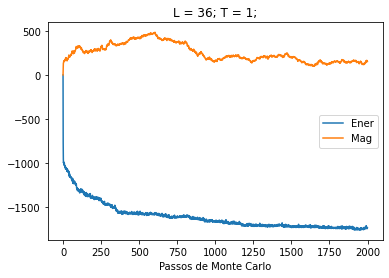

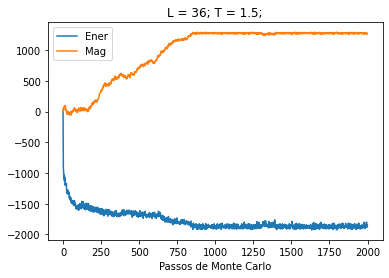

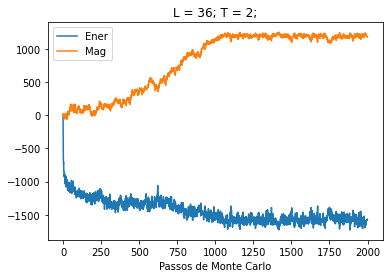

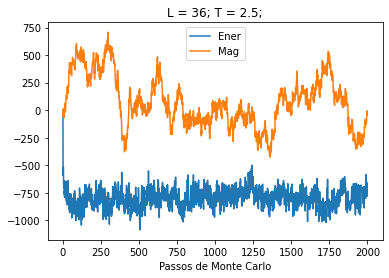

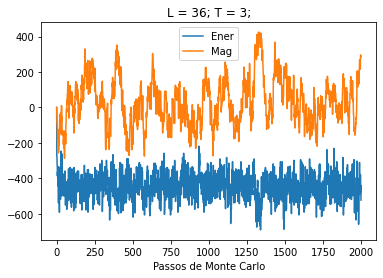

In [45]:
grafico(T=0.5, L=36, PASSOS=2000)
grafico(T=1, L=36, PASSOS=2000)
grafico(T=1.5, L=36, PASSOS=2000)
grafico(T=2, L=36, PASSOS=2000)
grafico(T=2.5, L=36, PASSOS=2000)
grafico(T=3, L=36, PASSOS=2000)

Podemos perceber que a medida que a temperatura varia para 0.5, 1, 1.5 e 2 há um aumento do número de passos de monte carlo necessário para convergencia da magnetização ocorrer. Porém após a temperatura 2, como por exemplo nas temperaturas 2.5 e 3, há um aumento na velocidade de convergência em torno do valor 0.

## Fixando o T em 1.5 e variando o L em [36, 49, 64, 81, 100]

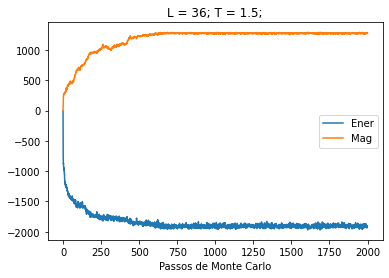

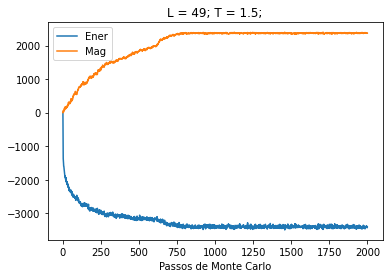

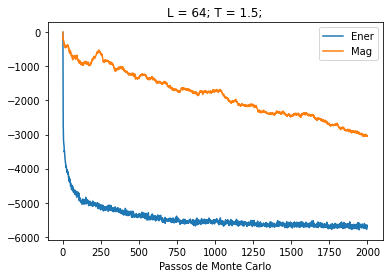

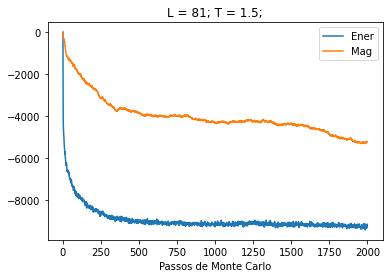

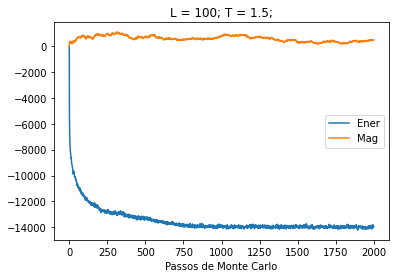

In [51]:
grafico(T=1.5, L=36, PASSOS=2000)
grafico(T=1.5, L=49, PASSOS=2000)
grafico(T=1.5, L=64, PASSOS=2000)
grafico(T=1.5, L=81, PASSOS=2000)
grafico(T=1.5, L=100, PASSOS=2000)

Agora, variando o tamanho de L e mantendo a temperatura fixa, não há grandes mudanças que podem ser notadas, parece manter um certo comportamento bem próximo dado a sua aleatoriedade, diferente ao que ocorreu quando se variava a temperatura.